In [3]:
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
pio.templates.default="plotly_white"

import matplotlib.pyplot as plt

import seaborn as sns

In [6]:
data = pd.read_csv("Sample - Superstore.csv", encoding ='latin-1')

In [9]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [10]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# Converting of Date Columns from type(object) to type(dateTime)

In [12]:
data['Order Date']=pd.to_datetime(data['Order Date'])
data['Ship Date']=pd.to_datetime(data['Ship Date'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

# Creating New columns of Order Month, Order Year , Order Day of week 

In [14]:
data['Order Month']=data['Order Date'].dt.month
data['Order Year']=data['Order Date'].dt.year
data['Order Day of Week']= data['Order Date'].dt.dayofweek

In [15]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6


# Creating New columns of Ship Month, Ship Year , Ship Day of week

In [16]:
data['Ship Month']=data['Ship Date'].dt.month
data['Ship Year']=data['Ship Date'].dt.year
data['Ship Day of Week']= data['Ship Date'].dt.dayofweek

In [17]:
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of Week,Ship Month,Ship Year,Ship Day of Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.9600,2,0.00,41.9136,11,2016,1,11,2016,4
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,731.9400,3,0.00,219.5820,11,2016,1,11,2016,4
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,14.6200,2,0.00,6.8714,6,2016,6,6,2016,3
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,957.5775,5,0.45,-383.0310,10,2015,6,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,22.3680,2,0.20,2.5164,10,2015,6,10,2015,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,25.2480,3,0.20,4.1028,1,2014,1,1,2014,3
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,91.9600,2,0.00,15.6332,2,2017,6,3,2017,4
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,258.5760,2,0.20,19.3932,2,2017,6,3,2017,4
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,29.6000,4,0.00,13.3200,2,2017,6,3,2017,4


# Problem Statement 1 - We need to calculate the monthly sales of the e-commerce store and identify which month had the highest sales and which month had the lowest sales.

In [31]:
sales_by_month=data.groupby('Order Month')['Sales'].sum().reset_index()

In [32]:
sales_by_month

,Order Month,Sales
0,1,94924.8356
1,2,59751.2514
2,3,205005.4888
3,4,137762.1286
4,5,155028.8117
5,6,152718.6793
6,7,147238.0970
7,8,159044.0630
8,9,307649.9457
9,10,200322.9847


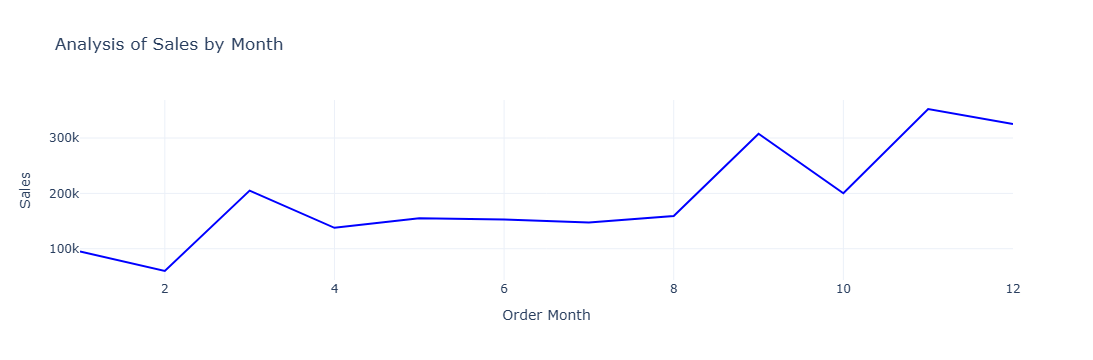

In [59]:
plotting=px.line(sales_by_month,
                  x="Order Month",
                  y="Sales",
                  title="Analysis of Sales by Month")
plotting.update_traces(line_color='blue')
plotting.show()

# Problem Statement 2 - We need to analyze sales based on product categories and determine which category has the lowest sales and which category has the highest sales.

In [36]:
data['Category']

0             Furniture
1             Furniture
2       Office Supplies
3             Furniture
4       Office Supplies
             ...       
9989          Furniture
9990          Furniture
9991         Technology
9992    Office Supplies
9993    Office Supplies
Name: Category, Length: 9994, dtype: object

In [37]:
sales_by_category=data.groupby('Category')['Sales'].sum().reset_index()

In [38]:
sales_by_category

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


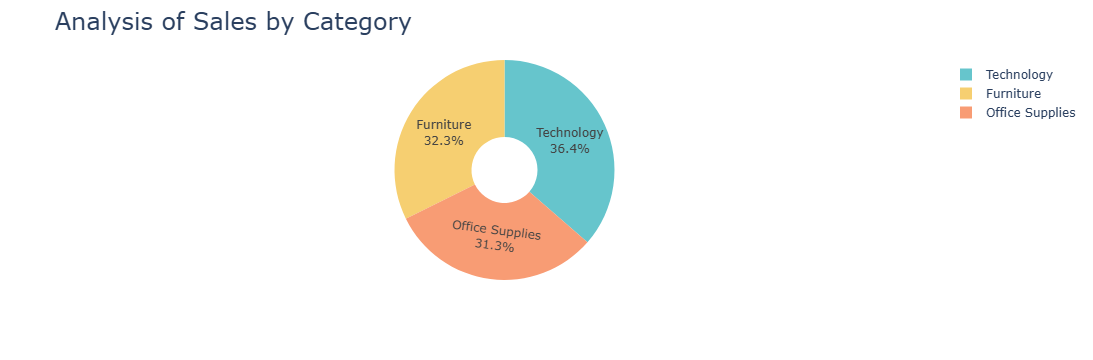

In [41]:
plotting=px.pie(sales_by_category,
               values='Sales',
               names='Category',
               hole=0.3,
               color_discrete_sequence=px.colors.qualitative.Pastel)


plotting.update_traces(textposition='inside', textinfo='percent+label')
plotting.update_layout(title_text='Analysis of Sales by Category', title_font=dict(size=24))

plotting.show()

# Problem Statement 3 -The sales analysis needs to be done based on sub-categories

In [43]:
sales_by_subcategory=data.groupby('Sub-Category')['Sales'].sum().reset_index()

In [44]:
sales_by_subcategory

,Sub-Category,Sales
0,Accessories,167380.3180
1,Appliances,107532.1610
2,Art,27118.7920
3,Binders,203412.7330
4,Bookcases,114879.9963
5,Chairs,328449.1030
6,Copiers,149528.0300
7,Envelopes,16476.4020
8,Fasteners,3024.2800
9,Furnishings,91705.1640


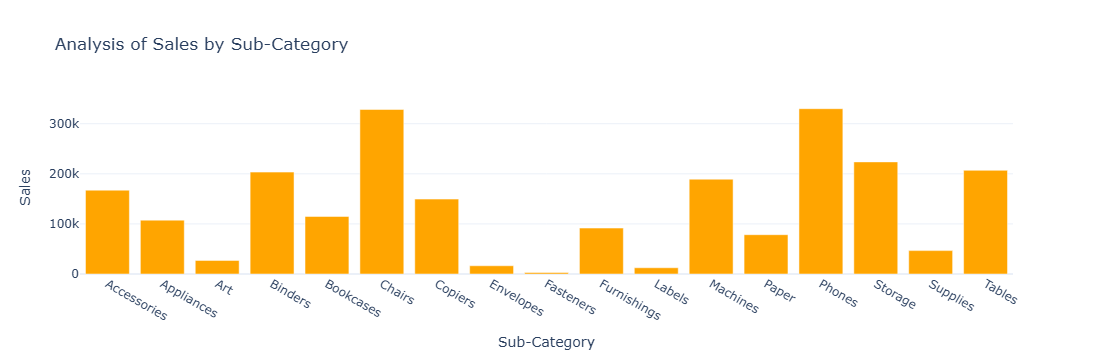

In [60]:
plotting=px.bar(sales_by_subcategory,x='Sub-Category',y='Sales',title='Analysis of Sales by Sub-Category')
plotting.update_traces(marker_color='orange')
plotting.show()

# Problem Statement 4 - We need to analyze the monthly profit from sales and determine the month with highest profit

In [46]:
profit_by_month=data.groupby('Order Month')['Profit'].sum().reset_index()

In [47]:
profit_by_month

,Order Month,Profit
0,1,9134.4461
1,2,10294.6107
2,3,28594.6872
3,4,11587.4363
4,5,22411.3078
5,6,21285.7954
6,7,13832.6648
7,8,21776.9384
8,9,36857.4753
9,10,31784.0413


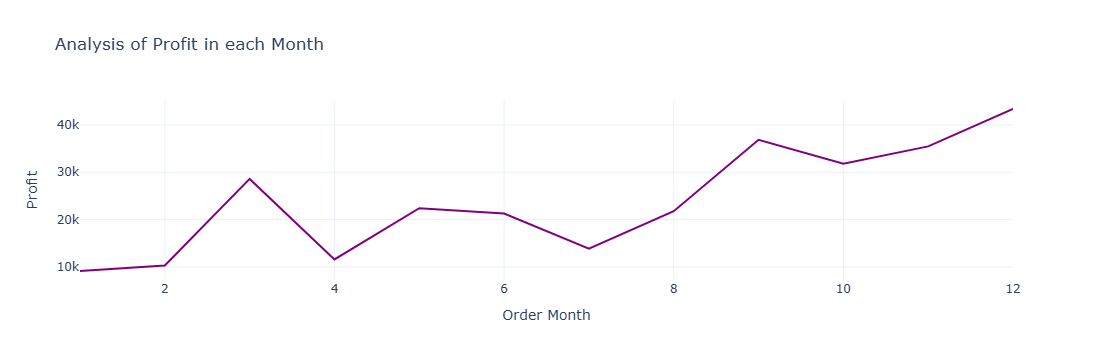

In [49]:
plotting = px.line(profit_by_month,x='Order Month',y='Profit',title='Analysis of Profit in each Month')
plotting.update_traces(line_color='purple')
plotting.show()

# Problem Statement 5 - Analyze the profit by category

In [61]:
profit_by_category= data.groupby('Category')['Profit'].sum().reset_index()

In [62]:
profit_by_category

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


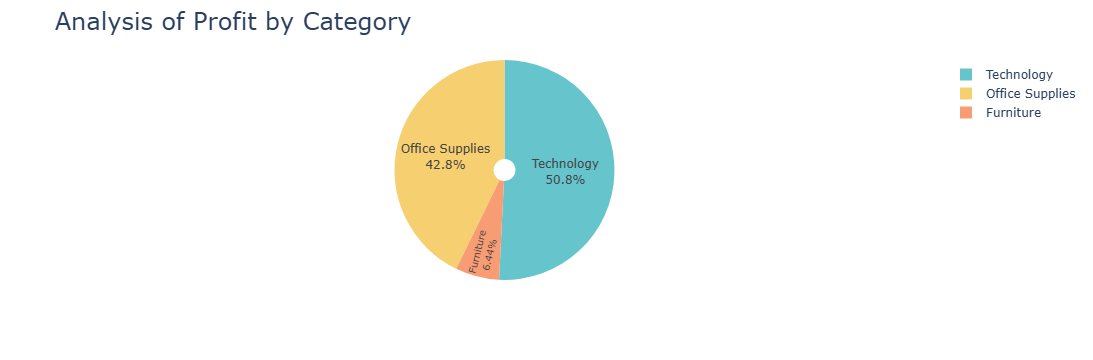

In [65]:
plotting=px.pie(profit_by_category,
               values='Profit',
               names='Category',
               hole=0.1,
               color_discrete_sequence=px.colors.qualitative.Pastel)


plotting.update_traces(textposition='inside', textinfo='percent+label')
plotting.update_layout(title_text='Analysis of Profit by Category', title_font=dict(size=24))

plotting.show()

# Problem Statement 6 - Analyze the profit by Sub-Category

In [66]:
profit_by_subcategory= data.groupby('Sub-Category')['Profit'].sum().reset_index()

In [67]:
profit_by_subcategory

,Sub-Category,Profit
0,Accessories,41936.6357
1,Appliances,18138.0054
2,Art,6527.7870
3,Binders,30221.7633
4,Bookcases,-3472.5560
5,Chairs,26590.1663
6,Copiers,55617.8249
7,Envelopes,6964.1767
8,Fasteners,949.5182
9,Furnishings,13059.1436


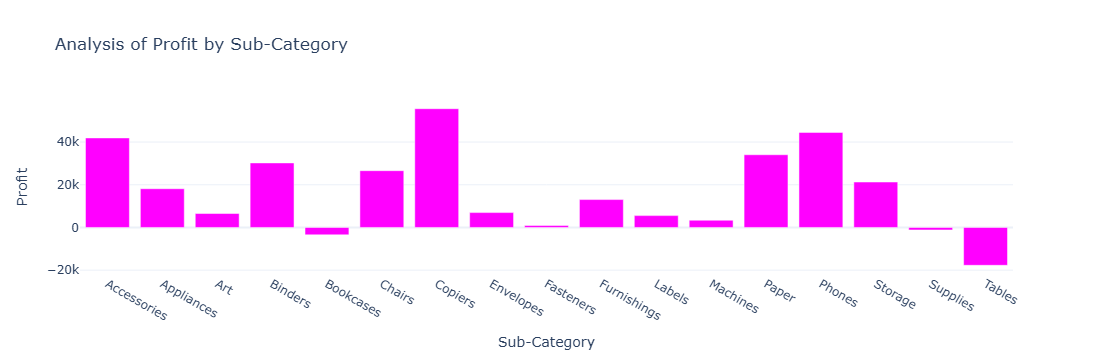

In [72]:

plotting= px.bar(profit_by_subcategory,x='Sub-Category',y='Profit',title='Analysis of Profit by Sub-Category')
plotting.update_traces(marker_color='magenta')

plotting.show()

# Problem Statement 7 - Analyze the sales and profit by customer segment

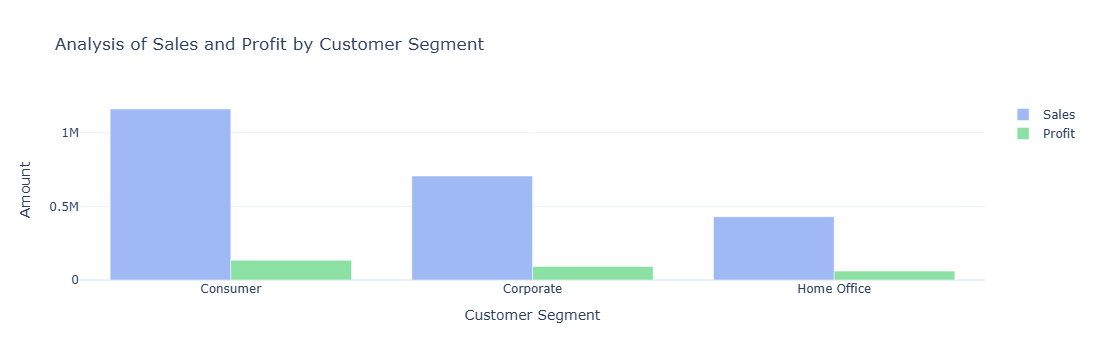

In [85]:
sales_profit_by_segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

color_palette = colors.qualitative.Pastel

plotting = go.Figure()
plotting.add_trace(go.Bar(x=sales_profit_by_segment['Segment'], 
                     y=sales_profit_by_segment['Sales'], 
                     name='Sales',
                     marker_color=color_palette[5]))

plotting.add_trace(go.Bar(x=sales_profit_by_segment['Segment'], 
                     y=sales_profit_by_segment['Profit'], 
                     name='Profit',
                     marker_color=color_palette[8]))

plotting.update_layout(title='Analysis of Sales and Profit by Customer Segment',
                  xaxis_title='Customer Segment', yaxis_title='Amount')

plotting.show()

# Problem Statement 8 - Analyze the sales to profit ratio


In [86]:
sales_profit_by_segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

sales_profit_by_segment['Sales_to_Profit_Ratio'] = sales_profit_by_segment['Sales'] / sales_profit_by_segment['Profit']

print(sales_profit_by_segment[['Segment', 'Sales_to_Profit_Ratio']])

       Segment  Sales_to_Profit_Ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416


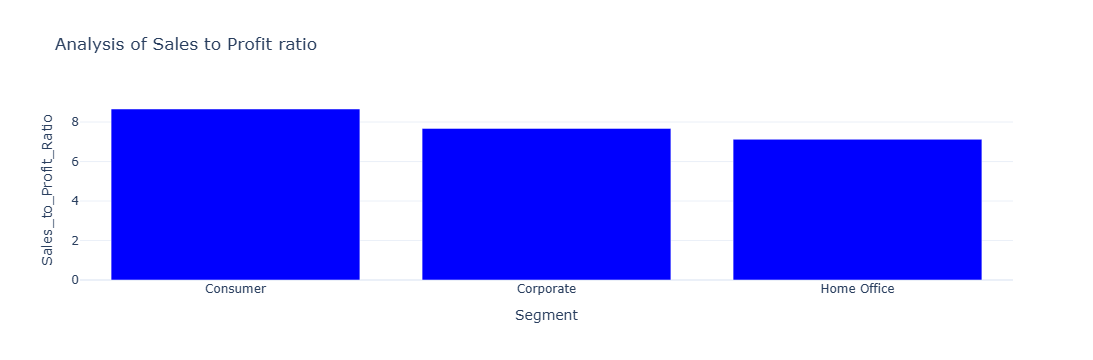

In [92]:
plotting=px.bar(sales_profit_by_segment,x=sales_profit_by_segment['Segment'],y=sales_profit_by_segment['Sales_to_Profit_Ratio'],
                title='Analysis of Sales to Profit ratio')
plotting.update_traces(marker_color='blue')
plotting.show()

# Problem Statement 9 - Analyze the mostly used Shipping Mode


In [93]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of Week,Ship Month,Ship Year,Ship Day of Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.9600,2,0.00,41.9136,11,2016,1,11,2016,4
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,731.9400,3,0.00,219.5820,11,2016,1,11,2016,4
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,14.6200,2,0.00,6.8714,6,2016,6,6,2016,3
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,957.5775,5,0.45,-383.0310,10,2015,6,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,22.3680,2,0.20,2.5164,10,2015,6,10,2015,6


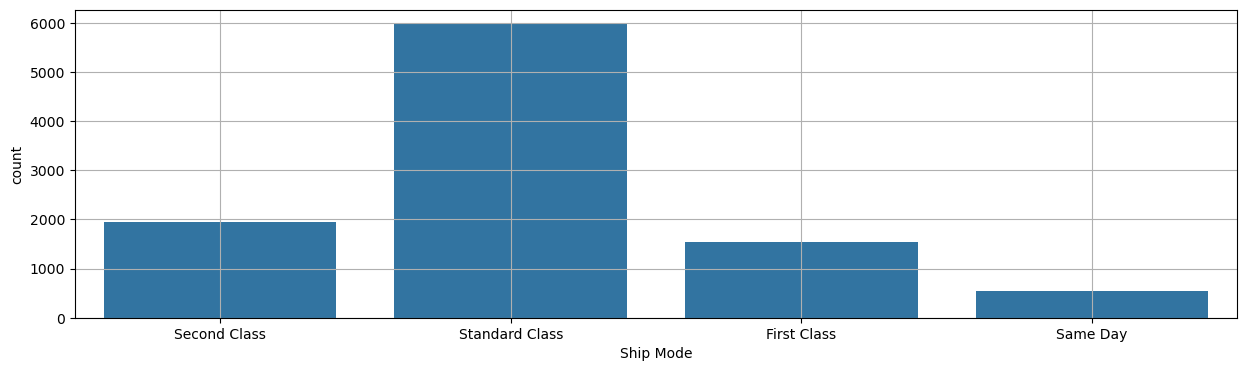

In [101]:
plt.figure(figsize=(15,4))

sns.countplot(x='Ship Mode',data=data)
plt.grid()
plt.show()

# Problem Statement 10 - Analyze the Shipping Mode by each Product Category

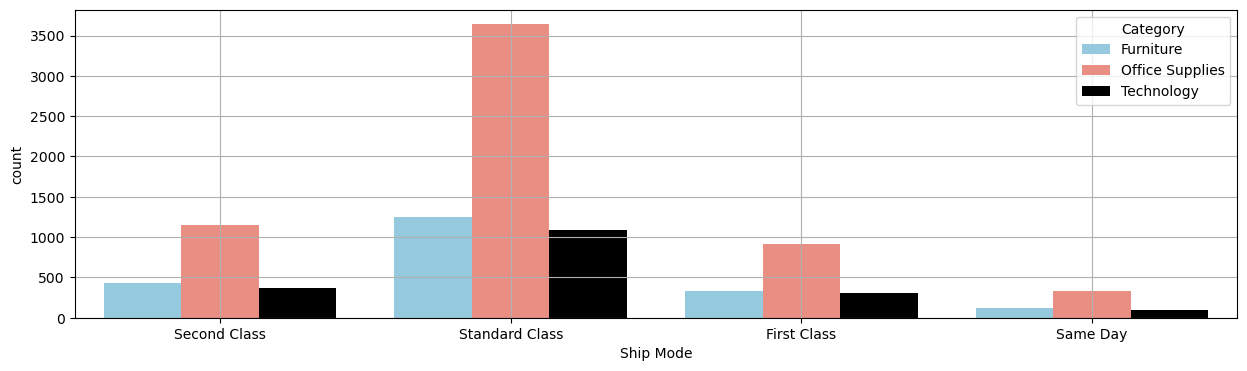

In [103]:
plt.figure(figsize=(15,4))
custom_colors_list = ["skyblue", "salmon","black"]
sns.countplot(x='Ship Mode',data=data,hue='Category',palette=custom_colors_list)
plt.grid()
plt.show()

# Problem Statement 11 - Identifying the Top-10 Cities by Sales



In [106]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of Week,Ship Month,Ship Year,Ship Day of Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.9600,2,0.00,41.9136,11,2016,1,11,2016,4
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,731.9400,3,0.00,219.5820,11,2016,1,11,2016,4
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,14.6200,2,0.00,6.8714,6,2016,6,6,2016,3
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,957.5775,5,0.45,-383.0310,10,2015,6,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,22.3680,2,0.20,2.5164,10,2015,6,10,2015,6


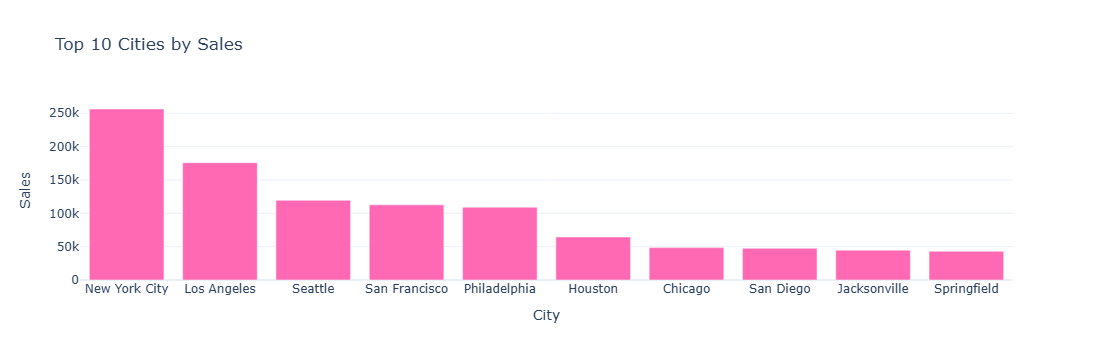

In [122]:
sales_by_city=data.groupby('City')['Sales'].sum().reset_index()
sales_by_city_sorted = sales_by_city.sort_values(by='Sales', ascending=False)
top_5_cities = sales_by_city_sorted.head(10)

plotting=px.bar(top_5_cities,x='City',y='Sales',title='Top 10 Cities by Sales')
plotting.update_traces(marker_color='hotpink')

plotting.show()



# Problem Statement 12 - Identifying the Bottom-10 Cities by Sales

In [126]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of Week,Ship Month,Ship Year,Ship Day of Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.9600,2,0.00,41.9136,11,2016,1,11,2016,4
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,731.9400,3,0.00,219.5820,11,2016,1,11,2016,4
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,14.6200,2,0.00,6.8714,6,2016,6,6,2016,3
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,957.5775,5,0.45,-383.0310,10,2015,6,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,22.3680,2,0.20,2.5164,10,2015,6,10,2015,6


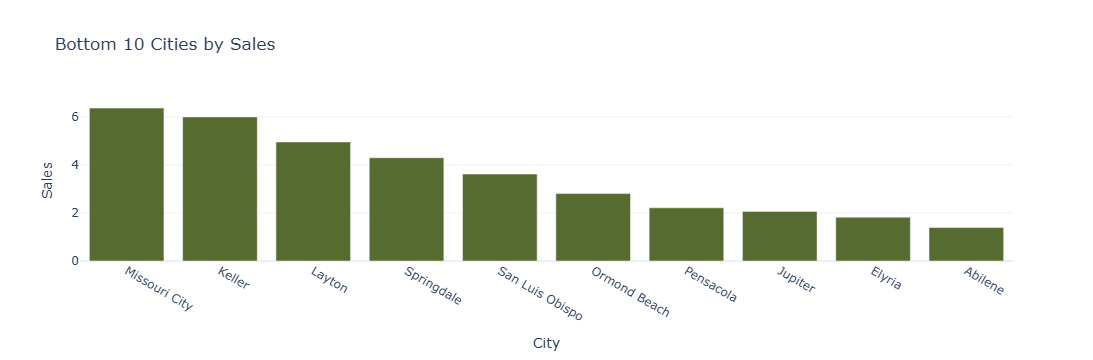

In [125]:
sales_by_city=data.groupby('City')['Sales'].sum().reset_index()
sales_by_city_sorted = sales_by_city.sort_values(by='Sales', ascending=False)
Bottom_5_cities = sales_by_city_sorted.tail(10)

plotting=px.bar(Bottom_5_cities,x='City',y='Sales',title='Bottom 10 Cities by Sales')
plotting.update_traces(marker_color='darkolivegreen')

plotting.show()


# Problem Statement 13 -Determine the Top 5 cities with Maximum Profits

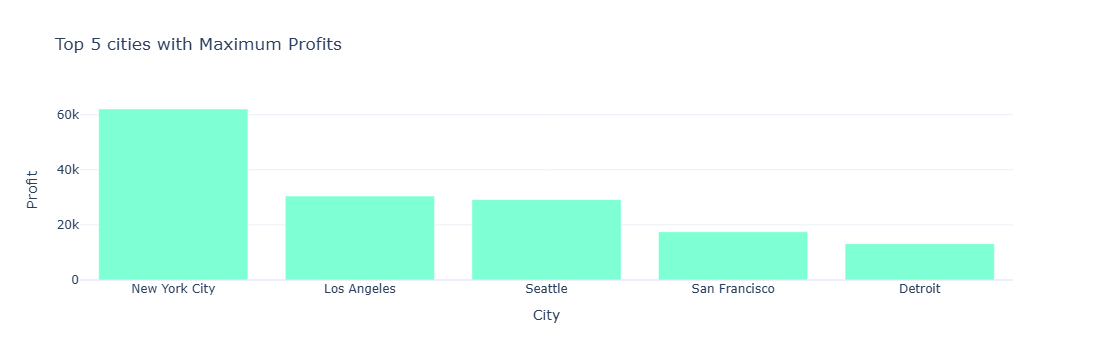

In [127]:
profit_by_city=data.groupby('City')['Profit'].sum().reset_index()
profit_by_city_sorted = profit_by_city.sort_values(by='Profit', ascending=False)
Top_5_cities_by_profit = profit_by_city_sorted.head(5)

plotting=px.bar(Top_5_cities_by_profit,x='City',y='Profit',title='Top 5 cities with Maximum Profits')
plotting.update_traces(marker_color='aquamarine')

plotting.show()

# Problem Statement 14 - Top 5 Customers with most number of Orders

In [130]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of Week,Ship Month,Ship Year,Ship Day of Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.9600,2,0.00,41.9136,11,2016,1,11,2016,4
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,731.9400,3,0.00,219.5820,11,2016,1,11,2016,4
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,14.6200,2,0.00,6.8714,6,2016,6,6,2016,3
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,957.5775,5,0.45,-383.0310,10,2015,6,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,22.3680,2,0.20,2.5164,10,2015,6,10,2015,6


In [146]:
top_5_customers=data['Customer ID'].value_counts().head(5).index.tolist()

data_top_5 = data[data['Customer ID'].isin(top_5_customers)]

data_top_5

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of Week,Ship Month,Ship Year,Ship Day of Week
34,35,CA-2017-107727,2017-10-19,2017-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,...,29.472,3,0.2,9.9468,10,2017,3,10,2017,0
599,600,US-2016-100720,2016-07-16,2016-07-21,Standard Class,CK-12205,Chloris Kastensmidt,Consumer,United States,Philadelphia,...,143.982,3,0.4,-28.7964,7,2016,5,7,2016,3
600,601,US-2016-100720,2016-07-16,2016-07-21,Standard Class,CK-12205,Chloris Kastensmidt,Consumer,United States,Philadelphia,...,494.376,4,0.4,-115.3544,7,2016,5,7,2016,3
601,602,US-2016-100720,2016-07-16,2016-07-21,Standard Class,CK-12205,Chloris Kastensmidt,Consumer,United States,Philadelphia,...,5.840,2,0.2,0.7300,7,2016,5,7,2016,3
641,642,CA-2017-167913,2017-07-30,2017-08-03,Second Class,JL-15835,John Lee,Consumer,United States,Mission Viejo,...,330.400,2,0.0,85.9040,7,2017,6,8,2017,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9410,9411,US-2017-110149,2017-12-10,2017-12-13,First Class,WB-21850,William Brown,Consumer,United States,Philadelphia,...,87.920,5,0.2,15.3860,12,2017,6,12,2017,2
9431,9432,CA-2015-111864,2015-06-19,2015-06-19,Same Day,PP-18955,Paul Prost,Home Office,United States,Philadelphia,...,5.904,2,0.2,1.9926,6,2015,4,6,2015,4
9834,9835,CA-2016-126627,2016-10-10,2016-10-12,First Class,WB-21850,William Brown,Consumer,United States,La Porte,...,14.000,4,0.6,-6.3000,10,2016,0,10,2016,2
9835,9836,CA-2016-126627,2016-10-10,2016-10-12,First Class,WB-21850,William Brown,Consumer,United States,La Porte,...,16.392,2,0.8,-26.2272,10,2016,0,10,2016,2


In [147]:
top_5_customers

['WB-21850', 'JL-15835', 'MA-17560', 'PP-18955', 'CK-12205']

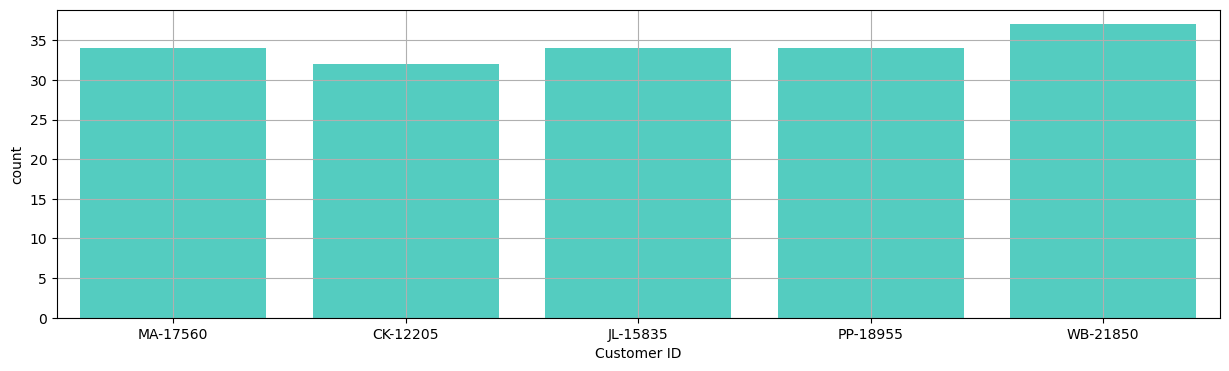

In [149]:
plt.figure(figsize=(15,4))

sns.countplot(data=data_top_5,x='Customer ID',color='turquoise')
plt.grid()
plt.show()

# Problem Statement 15 - Sales and Profit by Year

In [151]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of Week,Ship Month,Ship Year,Ship Day of Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.9600,2,0.00,41.9136,11,2016,1,11,2016,4
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,731.9400,3,0.00,219.5820,11,2016,1,11,2016,4
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,14.6200,2,0.00,6.8714,6,2016,6,6,2016,3
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,957.5775,5,0.45,-383.0310,10,2015,6,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,22.3680,2,0.20,2.5164,10,2015,6,10,2015,6


In [153]:
data['Order Year'].unique

<bound method Series.unique of 0       2016
1       2016
2       2016
3       2015
4       2015
        ... 
9989    2014
9990    2017
9991    2017
9992    2017
9993    2017
Name: Order Year, Length: 9994, dtype: int32>

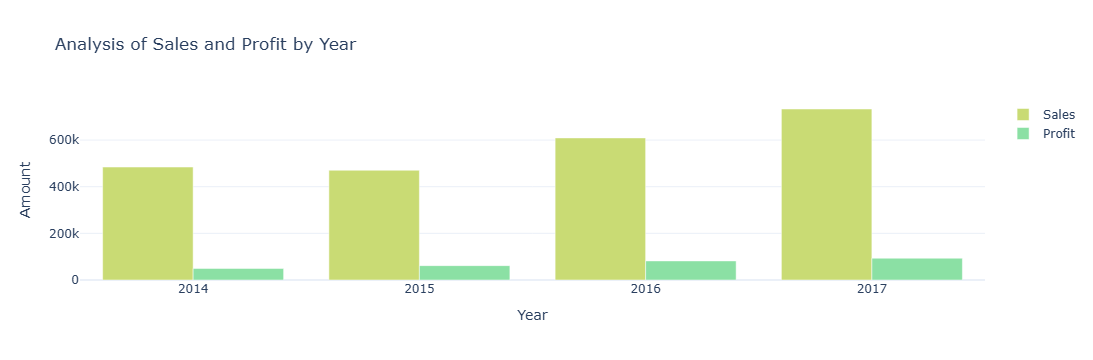

In [161]:
sales_profit_by_year = data.groupby('Order Year').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

color_palette = colors.qualitative.Pastel

plotting = go.Figure()
plotting.add_trace(go.Bar(x=sales_profit_by_year['Order Year'], 
                     y=sales_profit_by_year['Sales'], 
                     name='Sales',
                     marker_color=color_palette[7]))

plotting.add_trace(go.Bar(x=sales_profit_by_year['Order Year'], 
                     y=sales_profit_by_year['Profit'], 
                     name='Profit',
                     marker_color=color_palette[8]))

plotting.update_layout(title='Analysis of Sales and Profit by Year',
                  xaxis_title='Year', yaxis_title='Amount')

plotting.show()